**Objective**

The primary objective of this project is to employ data science and machine learning techniques to analyze a Telecom service dataset, with the ultimate goal of predicting customer churn. Through comprehensive data visualization, we aim to identify key indicators such as Tenure and Monthly Rates that influence customer attrition. The project involves the development of a deep learning model using TensorFlow to achieve accurate predictions. The successful implementation of this model will not only enhance our understanding of customer behavior but also provide actionable insights for targeted marketing strategies to mitigate customer churn in the future.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In this phase, our goal is to extract crucial information from the dataset to facilitate accurate predictions. We will systematically identify and eliminate less informative features, ensuring that only relevant variables are considered. Additionally, we will standardize data types across the dataset and clean any data elements that may pose challenges during analysis.

In [2]:
df = pd.read_csv("churn_data.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
978,6646-QVXLR,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.75,6383.35,Yes
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
3181,1265-ZFOSD,Female,0,Yes,No,64,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Mailed check,81.30,5129.3,No
1488,8695-WDYEA,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,51.25,51.25,No
3356,2235-ZGKPT,Female,0,Yes,Yes,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,50.85,239.55,Yes


customerID will not be useful in this situation so it should be dropped from the table.

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2923,4402-FTBXC,Male,0,No,No,54,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,89.80,4667,No
2887,5696-QURRL,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.05,45.05,Yes
6173,2378-HTWFW,Male,1,No,No,35,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,No,Credit card (automatic),91.00,3180.5,No
1577,9254-RBFON,Female,0,Yes,Yes,17,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,Yes
1693,7359-WWYJV,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.45,8375.05,No


The customerID column is gone now

In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that total charges appears to be an object instead of a float.
Let's change that!

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The TotalCharges is stored as a string in comparison to the MonthlyCharges stored as a float as seen below

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
#Conversion from string to float
#pd.to_numeric(df.TotalCharges)

Seems like we are getting an error becuase some of the data has empty space in the field.
We can bypass this for the moment to get a better look.

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

We can actuall supply the whole above function call to the index fo the data frame to see where we are having an issue.

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

Seems like we have 11 trash rows out of around 7000 rows so I'm okay with just dropping them 

In [11]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
#created a new data frame with the 11 garbage rows dropped
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We are done with the empty space issue, however we still need to convert the string to float.

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/_f/5tj3d8gn1dx_qt1lgz120rbr0000gn/T/ipykernel_55329/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

Conversion Succesful! Now let's move on to some visualization.

Looking through all the features tenure seems to be something that sticks out. Let's take a deeper dive to see what going on there.

In [16]:
#This will show which customers are not leaving and their tenure
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

Now lets split them into cutomers who are churning and those who are not


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

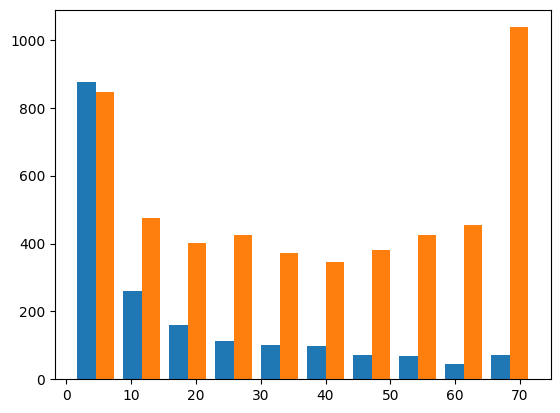

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

#lets plot these now
plt.hist([tenure_churn_yes,tenure_churn_no])

We really can't see much from this plot so lets try again with some legends and colors.

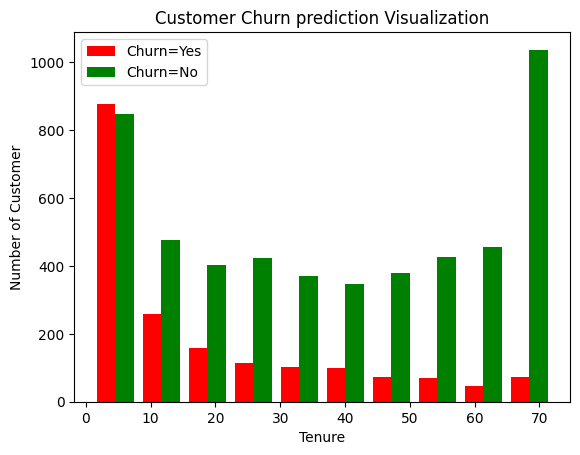

In [18]:
plt.xlabel("Tenure")
plt.ylabel("Number of Customer")
plt.title("Customer Churn prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no], color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

#I'm doing this around christmas time so we can use red and green

This is much better, now we can actually take away valuable insights from our data.
Based on the data, customers with a lower tenure have a higher chance of leaving.
This begs the question, how can we increase retention?

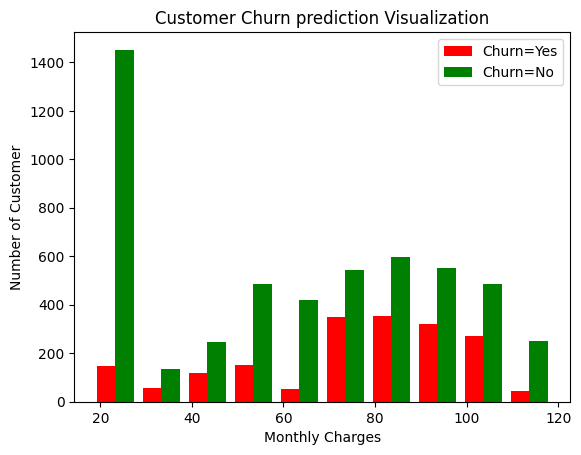

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

#lets plot these now
plt.hist([tenure_churn_yes,tenure_churn_no])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customer")
plt.title("Customer Churn prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no], color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

From this second visualization we come across another issue. Customer with monthly charges equal to $70 and above are at a high risk of churning. How do we alleviate this situation?


Let's now take deepter dive into the associated features and thier mappings.

In [20]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Our columns have a lot of duplicate categories, e.g. MultipleLines has both 'No phone service' and 'No'.
Let fix that to be just 'Yes' or 'No' for all the relevant columns. 

In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/var/folders/_f/5tj3d8gn1dx_qt1lgz120rbr0000gn/T/ipykernel_55329/1172639594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/_f/5tj3d8gn1dx_qt1lgz120rbr0000gn/T/ipykernel_55329/1172639594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


Now that we have done the intial cleaning, lets enhance our data by transforming our 'yes' or 'no' to binary values
to simplfy the training of our model.

In [23]:
yes_no_columns = ['Partner','Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)

/var/folders/_f/5tj3d8gn1dx_qt1lgz120rbr0000gn/T/ipykernel_55329/2022153740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)


In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Alright, were cooking with fire now. Now let's try some one hot encoding.

In [25]:

df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/_f/5tj3d8gn1dx_qt1lgz120rbr0000gn/T/ipykernel_55329/1688734998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [26]:
df1['gender'].unique()

array([1, 0])

In [27]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

We have created new unique columns from the original columns that had multiple sub categories.
Ex. Contract is now split into 4 categories.
This allows us to easily extract further insight and leverage more of the data for later training.

In [28]:
df2.sample(4)
#look at all the awesome new features!!!

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2325,1,0,1,1,4,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2735,0,1,0,0,52,1,1,0,0,0,...,False,True,False,True,False,False,True,False,False,False
4713,0,0,1,1,58,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3351,1,0,0,0,16,1,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True


In [29]:
yes_no_columns2 = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No',	'Contract_Month-to-month',	'Contract_One year',	'Contract_Two year',	'PaymentMethod_Bank transfer (automatic)',	'PaymentMethod_Credit card (automatic)',	'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check']
for col in yes_no_columns2:
    df2[col].replace({True:1,False: 0},inplace=True)
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1189,0,0,0,0,3,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2416,0,0,0,0,27,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1307,1,0,0,0,36,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
6242,1,0,1,1,72,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [30]:
df2.dtypes
df2.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

Although most of our data is in the format of 0 or 1, we now have to worry about certain categories such as Tenure, Monthly Charges, and Total Charges. Columns that greatly exceed the bounds of our typical data need to be scaled for deep learning. Let's go fix them!

In [31]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
#to scale these values we are going to use a MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Mission Success! The data has been appropiately scaled and the data frame is ready to be used in training.
Before we can create the model a train and test split is necessary.

In [33]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [34]:
#start of training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
#We will use 80% for training
X_train.shape

(5625, 26)

In [36]:
#The other 20% will be used for testing
X_test.shape

(1407, 26)

In [37]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


The above is our beautiful testing data.
Now we are gonna get to the good stuff, creating a neural network.

In [38]:
import tensorflow as tf
from tensorflow import keras

#We will enter each layer one by one
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'), #This is our input layer based on the number of features. The activation is set to relu due to the simplicty of calculating the value
    keras.layers.Dense(1,activation='sigmoid'), # The is the output set to sigmoid becuase our output will be 1 or 0.
])

model.compile(optimizer = 'adam', #Note I chose adam however other optimizers could have been selected
              loss='binary_crossentropy', #loss will be binary_crossentrop because our output is binary
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)#Lets run this for 5 epochs and check our accuracy

Epoch 1/5
176/176 [==============================] - 0s 533us/step - loss: 0.5450 - accuracy: 0.7204
Epoch 2/5
176/176 [==============================] - 0s 467us/step - loss: 0.4414 - accuracy: 0.7915
Epoch 3/5
176/176 [==============================] - 0s 463us/step - loss: 0.4241 - accuracy: 0.8004
Epoch 4/5
176/176 [==============================] - 0s 463us/step - loss: 0.4183 - accuracy: 0.8005
Epoch 5/5
176/176 [==============================] - 0s 458us/step - loss: 0.4155 - accuracy: 0.8052


The model hit about 80% accuracy with 5 epochs so now we can crank it up.

In [39]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 502us/step - loss: 0.4138 - accuracy: 0.8025
Epoch 2/100
176/176 [==============================] - 0s 465us/step - loss: 0.4121 - accuracy: 0.8057
Epoch 3/100
176/176 [==============================] - 0s 456us/step - loss: 0.4113 - accuracy: 0.8085
Epoch 4/100
176/176 [==============================] - 0s 469us/step - loss: 0.4100 - accuracy: 0.8068
Epoch 5/100
176/176 [==============================] - 0s 460us/step - loss: 0.4097 - accuracy: 0.8084
Epoch 6/100
176/176 [==============================] - 0s 460us/step - loss: 0.4095 - accuracy: 0.8103
Epoch 7/100
176/176 [==============================] - 0s 458us/step - loss: 0.4078 - accuracy: 0.8107
Epoch 8/100
176/176 [==============================] - 0s 462us/step - loss: 0.4072 - accuracy: 0.8114
Epoch 9/100
176/176 [==============================] - 0s 460us/step - loss: 0.4064 - accuracy: 0.8108
Epoch 10/100
176/176 [==============================] - 0s 457us/step - l

Our final accuracy was about 82%. Thats a pretty solid number, however there's always opportunity to improve and we could revisit our model and add more layers later on.
Now, let's evaluate on X_test and y_test

In [40]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 516us/step - loss: 0.4586 - accuracy: 0.7896


[0.45857158303260803, 0.7896233201026917]

The model hit close to 80% on the evaluation. This looks like a resonable score, lets move on to the testing.

In [41]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 364us/step


array([[0.3403266 ],
       [0.4073316 ],
       [0.01529404],
       [0.8373409 ],
       [0.58390516]], dtype=float32)

In [42]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In comparison to the test, our models prediction is a multidimensional array with values between 0 and 1 due to the sigmoid acitivation. Let's adjust this to get a 0 or a 1.
We can say values equal to or above 0.5 will become a 1, and values below 0.5 will become a 0.

In [43]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [44]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In comparison to the test set, the prediction values were only off by one. So despite the evaluation being around 80% we ended up with an accuracy of 90% with specifically the first 10 values. Let's take a further look at the numbers to see what we can discover.

In [46]:
#We will now plot the overall perfomance of our model
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Let's also look at the confusion matrix.

Text(95.72222222222221, 0.5, 'Truth')

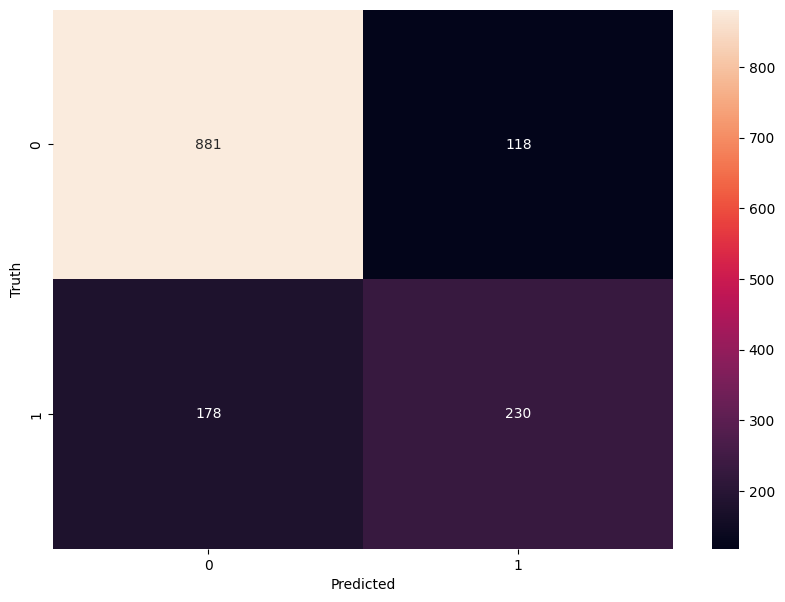

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

By looking at the digonals on the confustion matrix we can see that our model made 1111 correct predictions and 296 innacurate predictions. Let's now find the actual accuracy of this model and determine how our classificaton report came up with these numbers.


In [50]:
#accuracy for model
round(1111/(1111+296),2)

0.79

We can now see our accuracy was 79% for this model which matches directly with the classifiction report.

In [55]:
#precision for class 0
round(881/(881+178),2)

0.83

In [2]:
#precision for class 1
round(230/(230+118),2)

0.66

Recall for class 0

In [57]:
round(881/(881+118),2)

0.88

Recall for class 1

In [1]:
round(230/(178+230),2)

0.56

**Conclusion**

The objective of this project was to analyze the provided dataset and predict customer churn in the Telecom service. We initiated the analysis with data visualization, discovering that Tenure and Monthly Rates were significant indicators of churn for this company. Notably, the company experienced consistent customer loss among those with less than 5 years of tenure and customers with a monthly rate around $70.

In terms of predictive modeling, we prepared the data for training and constructed a deep learning model using TensorFlow, achieving an accuracy of up to 80%. This model could prove valuable in the future for targeted marketing efforts aimed at retaining customers likely to leave the services of this business.